##Реализация Алгоритма k-means

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
n_samples = 150
n_clusters = 6
X, y = make_blobs(n_samples = n_samples, n_features = 2, centers = n_clusters, random_state = 100)


In [3]:
#creating centers
#np.random.seed(4)
centers = np.empty((0,2))
for i in range(n_clusters):
    rand_line = np.random.randint(0, n_samples)
    #print( rand_line )
    centers = np.append(centers, X[rand_line, :])

centers = np.reshape(centers, (n_clusters, 2))

In [4]:
#adding to X clusters column
clusters = np.random.randint(0, n_clusters, (n_samples, 1))
X_with_clusters = np.append(X, clusters, axis=1)

Начальное состояние:

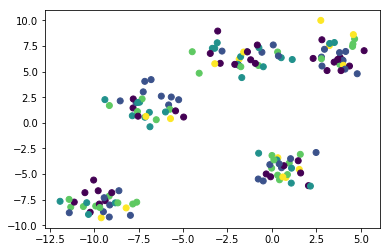

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=X_with_clusters[:, 2])

In [6]:
X_with_clusters[:, 2]

array([3., 3., 0., 0., 1., 0., 1., 1., 0., 3., 1., 1., 2., 1., 3., 1., 4.,
       3., 3., 4., 2., 3., 4., 3., 4., 2., 0., 0., 2., 3., 1., 0., 0., 3.,
       2., 0., 2., 2., 1., 1., 0., 1., 1., 2., 0., 1., 4., 2., 4., 3., 3.,
       0., 2., 1., 0., 3., 1., 3., 3., 3., 1., 1., 1., 2., 3., 0., 2., 2.,
       3., 0., 2., 0., 1., 3., 1., 1., 3., 1., 1., 0., 0., 1., 4., 0., 4.,
       1., 3., 2., 4., 4., 3., 0., 1., 2., 2., 4., 0., 1., 0., 0., 4., 2.,
       2., 4., 1., 1., 0., 2., 0., 1., 0., 1., 3., 0., 3., 2., 0., 4., 0.,
       2., 3., 0., 3., 1., 1., 1., 2., 3., 2., 1., 0., 4., 3., 2., 2., 0.,
       0., 0., 1., 3., 0., 2., 0., 3., 0., 2., 0., 3., 3., 2.])

**Сам алгоритм:**

In [7]:
cur_clusters = np.zeros(n_samples, float)
print( np.shape(cur_clusters) )
difference = 5
while ( np.max(difference) != 0 ):
    prev_centers = np.copy(centers)
    j = 0
    for i in X:
        center_X_difference = np.array([ m - i for m in centers ])
        cur_clusters[j] = np.argsort(np.linalg.norm((center_X_difference), axis=1))[0]
        j = j + 1
    X_with_clusters[:, 2] = cur_clusters    
    for k in range(n_clusters):
        power_of_cluster = np.alen(X[X_with_clusters[:,2] == k ])
        if power_of_cluster != 0:
            centers[k, :] = np.nansum(X[X_with_clusters[:, 2] == k], axis=0) // power_of_cluster
    difference = np.linalg.norm((centers - prev_centers), axis=1)
    print(difference)
    #plt.scatter(X[:, 0], X[:, 1], c=X_with_clusters[:, 2])

(150,)
[4.50926085 2.5969518  1.57467103 3.27143071 0.        ]
[2.23606798 0.         1.         1.         0.71192217]
[2.23606798 0.         0.         2.23606798 0.        ]
[1.41421356 0.         1.         1.         0.        ]
[1.41421356 0.         1.         0.         0.        ]
[1. 0. 0. 0. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0.]


**После работы алгоритма:**

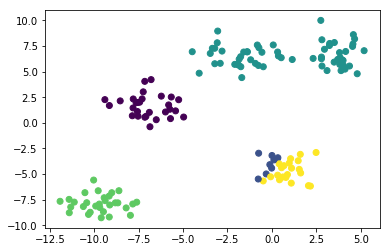

In [8]:
X_with_clusters.astype(int)
plt.scatter(X[:, 0], X[:, 1], c=X_with_clusters[:,2])

**Сравним с работой алгоритма KMeans( sklearn )**

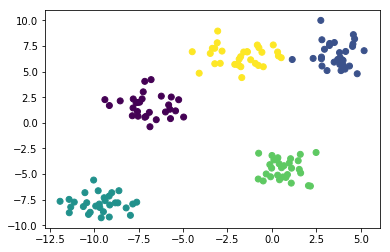

In [9]:
from sklearn.cluster import KMeans
a = KMeans(n_clusters=n_clusters, random_state=0).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=a)

In [10]:
np.shape(a)

(150,)

In [12]:
np.shape(X_with_clusters[:, 2])



(150,)